In [18]:
#Importing libraries
!pip install imblearn
import seaborn 
import pandas as pd
import scipy as sy
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, silhouette_score,euclidean_distances
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score

In [19]:
#Extracting data from txt file
data_frame = pd.read_csv('data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'], header=0)
print(data_frame)
# convert to numpy array
X = data_frame.iloc[:, 0:4].to_numpy()
y = data_frame.iloc[:, 4:5].to_numpy()
print(X)
print(y)


      variance  skewness  curtosis  entropy  class
0      4.54590   8.16740   -2.4586 -1.46210      0
1      3.86600  -2.63830    1.9242  0.10645      0
2      3.45660   9.52280   -4.0112 -3.59440      0
3      0.32924  -4.45520    4.5718 -0.98880      0
4      4.36840   9.67180   -3.9606 -3.16250      0
...        ...       ...       ...      ...    ...
1366   0.40614   1.34920   -1.4501 -0.55949      1
1367  -1.38870  -4.87730    6.4774  0.34179      1
1368  -3.75030 -13.45860   17.5932 -2.77710      1
1369  -3.56370  -8.38270   12.3930 -1.28230      1
1370  -2.54190  -0.65804    2.6842  1.19520      1

[1371 rows x 5 columns]
[[  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 [  3.4566    9.5228   -4.0112   -3.5944 ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


<function matplotlib.pyplot.show(close=None, block=None)>

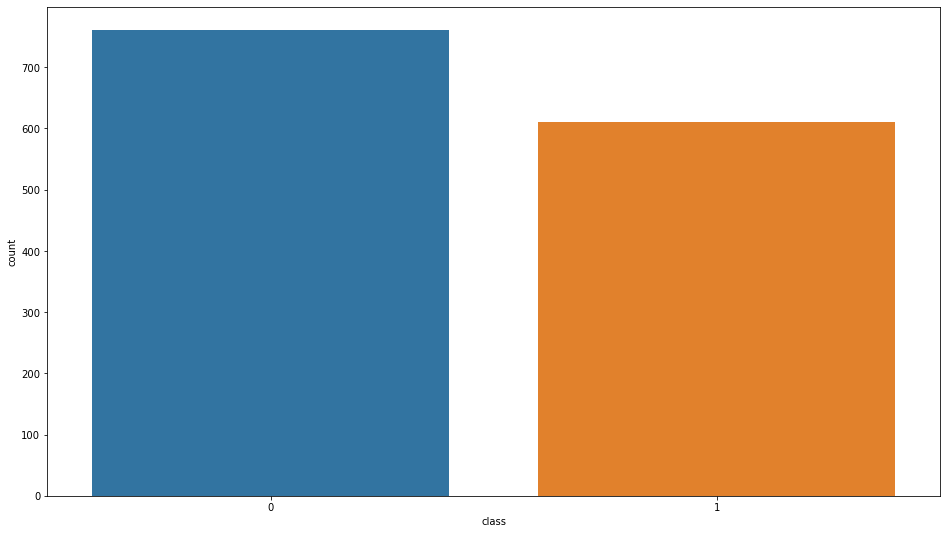

In [20]:
# Checking data is balanced or not
plt.figure(figsize = ((16,9)))
sns.countplot(x='class',data =data_frame)
plt.show

In [21]:
#Statistics of data
data_frame.describe()

,variance,skewness,curtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


          variance  skewness  curtosis   entropy     class
variance  1.000000  0.263333 -0.380358  0.276666 -0.724655
skewness  0.263333  1.000000 -0.786729 -0.526896 -0.444281
curtosis -0.380358 -0.786729  1.000000  0.319219  0.155346
entropy   0.276666 -0.526896  0.319219  1.000000 -0.023200
class    -0.724655 -0.444281  0.155346 -0.023200  1.000000


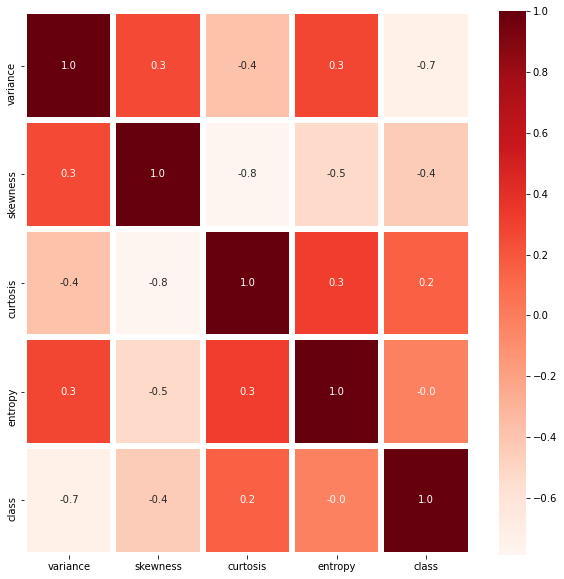

In [22]:
#correlation of dataset
correlation_matrix = data_frame.corr()
print(correlation_matrix)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data_frame.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax, cmap='Reds')
plt.show()

In [23]:
#Checking for null values against features
data_frame.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

C:\Users\HASSAN MOIN\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HASSAN MOIN\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


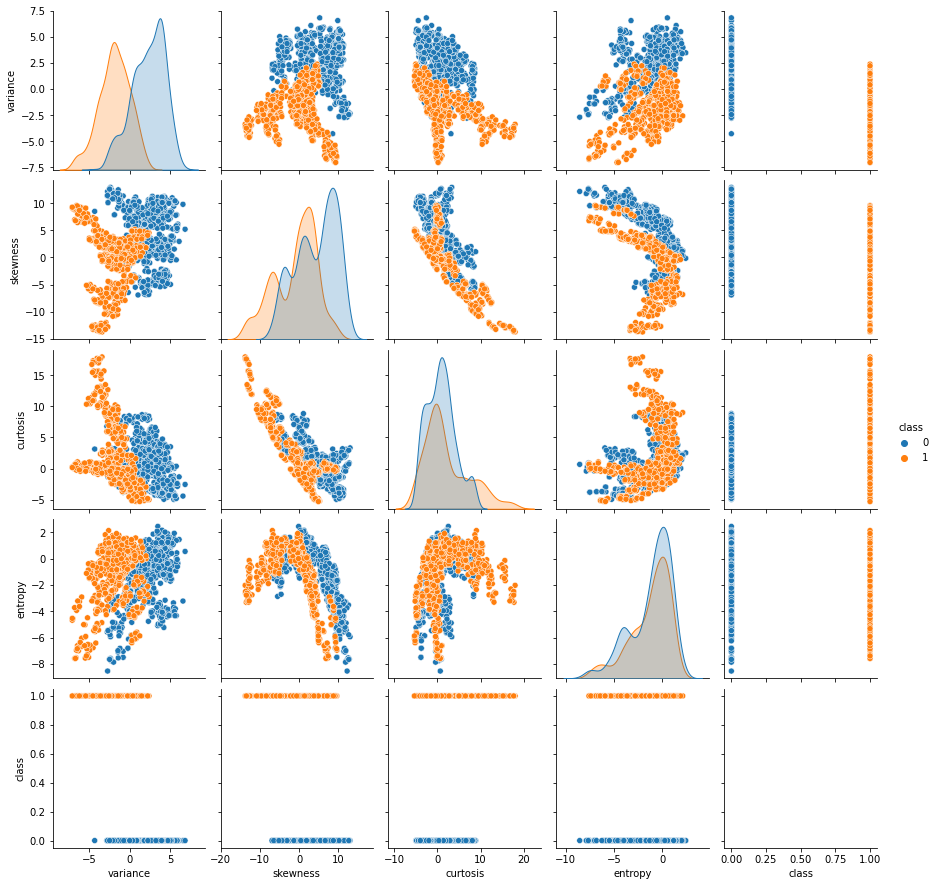

In [24]:
#Scatter Plots according to attributes
colors=['red','green']
grid= seaborn.pairplot(data=data_frame,kind='scatter',vars=['variance', 'skewness', 'curtosis', 'entropy', 'class'],hue='class',diag_kind='kde')
plt.show()

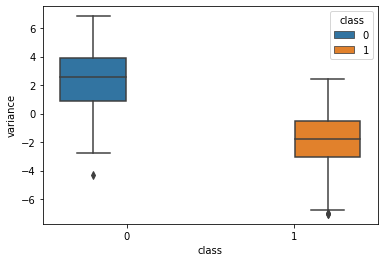

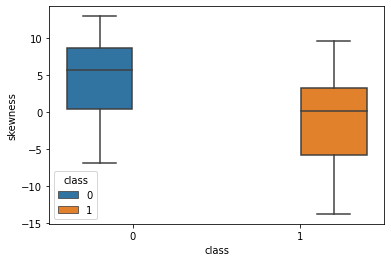

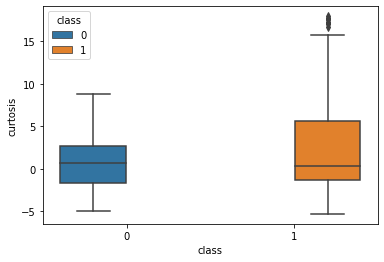

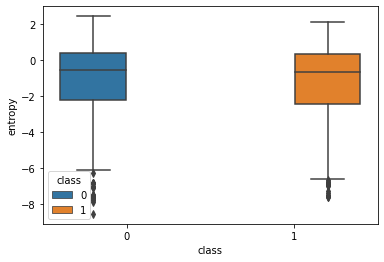

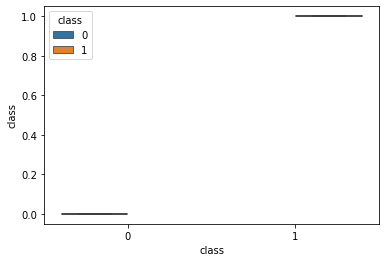

<Figure size 432x288 with 0 Axes>

In [25]:
#BoxPlots
columns=['variance', 'skewness', 'curtosis', 'entropy', 'class']
for i in columns:
    ax = seaborn.boxplot(x='class', y= i , data=data_frame,hue='class')
    plt.figure()

In [26]:
#Scaling features
scaled_features=preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
print(scaled_features)

[[0.83565902 0.82098209 0.12180412 0.64432563]
 [0.78662859 0.41664827 0.31060805 0.78695091]
 [0.75710505 0.87169921 0.05492063 0.45043964]
 ...
 [0.23738543 0.01176814 0.98560321 0.52475518]
 [0.25084193 0.20170105 0.76158701 0.6606745 ]
 [0.32452819 0.49074676 0.34334762 0.88594888]]


In [27]:
#Splitting dataset into train test 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y,test_size=0.2, shuffle = True, random_state = 7)
#Splitting trainning set to train and validation 75% / 25%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 7) 

In [28]:
#confusion matrix metric
def confusion_matrix_plot(y_test, y_pred):
    confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
    graph_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionmatrix, display_labels = [False, True])
    return graph_plot

In [29]:
#precision recall curve
def precision_recall_curve(y_test, y_pred):
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred)
    graph = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
    return graph

Testing accuracy: 0.9963636363636363
Precision:  0.9915254237288136
Recall:  1.0
F1-Score 0.9957446808510638


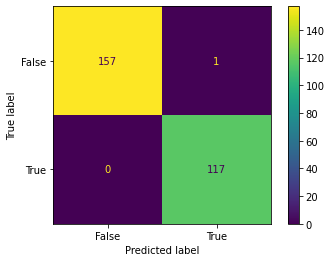

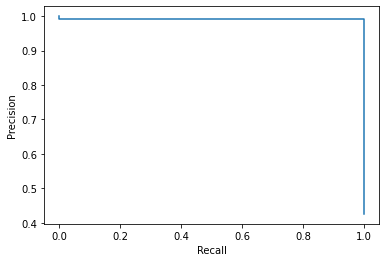

In [30]:
#Knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,np.ravel(y_train))
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
fp1, tp1, threshold1 = roc_curve(y_test, y_pred)
print("Testing accuracy:", accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score',f1_score)
#confusion matrix
graph_plot = confusion_matrix_plot(y_test, y_pred)
graph_plot.plot()
plt.savefig('Knn.png')
#Precision recall curve
graph_plot = precision_recall_curve(y_test, y_pred)
graph_plot.plot()

In [31]:
#Grid Search for KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_grid_search = GridSearchCV(knn, param_grid, cv=5)
knn_grid_search.fit(X, np.ravel(y))

print("Hyper tuned value of K: ", knn_grid_search.best_params_)
print("Best score of model against hyper tuned value of K: ",knn_grid_search.best_score_)

Hyper tuned value of K:  {'n_neighbors': 2}
Best score of model against hyper tuned value of K:  1.0


Testing accuracy 0.9854545454545455
Precision:  0.9747899159663865
Recall:  0.9914529914529915
F1-Score 0.983050847457627


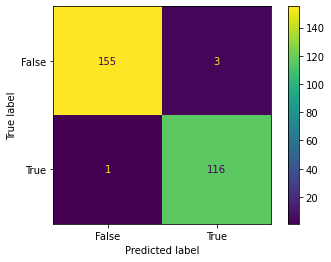

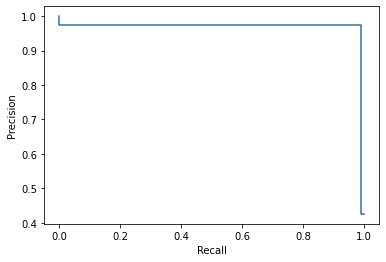

In [32]:
#Logistic Regression
logistic_regression = LogisticRegression(C=1000.0, random_state=0)
logistic_regression.fit(X_train, np.ravel(y_train))
y_pred = logistic_regression.predict(X_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
fp2, tp2, threshold2 = roc_curve(y_test, y_pred)
print('Testing accuracy',accuracy_score(y_test, y_pred))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score',f1_score)
#confusion matrix
graph_plot = confusion_matrix_plot(y_test, y_pred)
graph_plot.plot()
plt.savefig('LR.png')
#Precision recall curve
graph_plot = precision_recall_curve(y_test, y_pred)
graph_plot.plot()

In [33]:
#Grid Search for logistic regression 
standard_scalar = StandardScaler()
pca = decomposition.PCA()
logistic_regression = LogisticRegression()
pipe = Pipeline(steps=[('std_slc', standard_scalar),('pca', pca),('logistic_Reg', logistic_regression)])
n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(pca__n_components=n_components,logistic_Reg__C=C,logistic_Reg__penalty=penalty)
logistic_regression_grid_Search = GridSearchCV(pipe, parameters)
logistic_regression_grid_Search.fit(X, np.ravel(y))
print('Hyper tuned value of Penalty:', logistic_regression_grid_Search.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Hyper tuned value of C:', logistic_regression_grid_Search.best_estimator_.get_params()['logistic_Reg__C'])
print('Hyper tuned value of Components:', logistic_regression_grid_Search.best_estimator_.get_params()['pca__n_components'])

Hyper tuned value of Penalty: l2
Hyper tuned value of C: 7.9060432109076855
Hyper tuned value of Components: 4


C:\Users\HASSAN MOIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HASSAN MOIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HASSAN MOIN\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\HASSAN MOIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solv

Testing accuracy: 0.9818181818181818
Precision:  0.9590163934426229
Recall:  1.0
F1-Score 0.9790794979079497


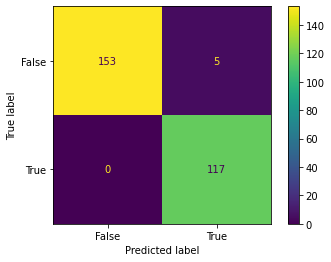

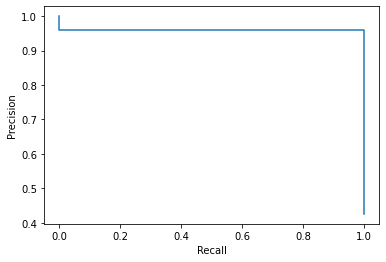

In [34]:
#SVM
support_vector_model = svm.LinearSVC()
support_vector_model.fit(X_train, np.ravel(y_train))
svm_predictions = support_vector_model.predict(X_test)
accuracy = accuracy_score(y_test,svm_predictions)
precision = metrics.precision_score(y_test, svm_predictions)
recall = metrics.recall_score(y_test, svm_predictions)
f1_score = metrics.f1_score(y_test, svm_predictions)
fp3, tp3, threshold3 = roc_curve(y_test, svm_predictions)
print("Testing accuracy:", accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score',f1_score)
#confusion matrix
graph_plot = confusion_matrix_plot(y_test, svm_predictions)
graph_plot.plot()
plt.savefig('SVM.png')
#Precision recall curve
graph_plot = precision_recall_curve(y_test, svm_predictions)
graph_plot.plot()

In [35]:
#Grid search for SVM
parameters_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
svm_grid_search = GridSearchCV(SVC(), parameters_grid, refit = True, verbose = 3)
svm_grid_search.fit(X_train, np.ravel(y_train))
print('Tuned Parameters after grid search: ', svm_grid_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.695 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.982 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.988 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.970 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.994 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.982 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.982 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.970 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.988 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.976 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.976 total time=   0.0s
[CV 2/5] END ..C=1000, gamma

Testing accuracy: 0.9927272727272727
Precision:  0.9914529914529915
Recall:  0.9914529914529915
F1-Score 0.9914529914529915


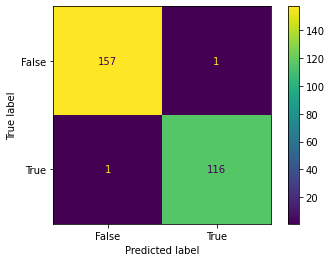

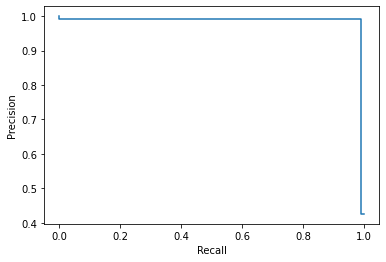

In [36]:
#Decision Tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
tree_predictions = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test,tree_predictions)
precision = metrics.precision_score(y_test, tree_predictions)
recall = metrics.recall_score(y_test, tree_predictions)
f1_score = metrics.f1_score(y_test, tree_predictions)
fp4, tp4, threshold4 = roc_curve(y_test, tree_predictions)
print("Testing accuracy:", accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score',f1_score)
#confusion matrix
graph_plot = confusion_matrix_plot(y_test, tree_predictions)
graph_plot.plot()
plt.savefig('DT.png')
#Precision recall curve
graph_plot = precision_recall_curve(y_test, tree_predictions)
graph_plot.plot()


In [37]:
#Grid search for Decision tree
standard_scalar = StandardScaler()
pca = decomposition.PCA()
decision_tree_model = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', standard_scalar),('pca', pca),('dec_tree', decision_tree_model)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
hyper_parameters = dict(pca__n_components=n_components,dec_tree__criterion=criterion,dec_tree__max_depth=max_depth)
decision_tree_grid_search = GridSearchCV(pipe, hyper_parameters)
decision_tree_grid_search.fit(X, y)
print('Hyper tuned criteria: ', decision_tree_grid_search.best_estimator_.get_params()['dec_tree__criterion'])
print('Hyper tuned max_depth: ', decision_tree_grid_search.best_estimator_.get_params()['dec_tree__max_depth'])
print('Hyper tuned Components: ', decision_tree_grid_search.best_estimator_.get_params()['pca__n_components'])

Hyper tuned criteria:  gini
Hyper tuned max_depth:  8
Hyper tuned Components:  4


Testing accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1-Score 1.0


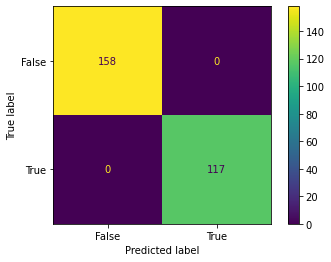

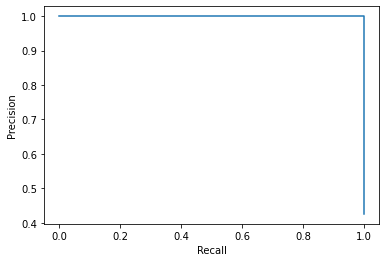

In [38]:
#Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=10000)
random_forest_classifier.fit(X_train,np.ravel(y_train))
y_pred = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
fp5, tp5, threshold5 = roc_curve(y_test, y_pred)
print("Testing accuracy:", accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score',f1_score)
#confusion matrix
graph_plot = confusion_matrix_plot(y_test, y_pred)
graph_plot.plot()
plt.savefig('RF.png')
#Precision recall curve
graph_plot = precision_recall_curve(y_test, y_pred)
graph_plot.plot()

In [ ]:
#Grid search to improve accuracy of random forest
random_forest_search_grid = {'max_depth': [3, None],'max_features': ['sqrt', 'log2', None],'min_samples_split': [1, 2, 4],'min_samples_leaf': [1, 2, 4],'bootstrap': [True, False],'n_estimators': [100, 500],'random_state': [1]}
gridSearch = GridSearchCV(RandomForestClassifier(), random_forest_search_grid,n_jobs=-1,verbose=True,scoring='accuracy')
gridSearch.fit(X_val, y_val)
print("Tuned parameters:", gridSearch.best_params_)
tunedRandomForestModel = gridSearch.best_estimator_
tunedRandomForestModel.fit(X_train,y_train)
print("Random Forest Tuned Accuracy Score ",tunedRandomForestModel.score(X_test,y_test))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
#plotting ROC curve
rp = [0 for i in range(len(y_test))]
rp_fp, rp_tp, _ = roc_curve(y_test, rp, pos_label=1)
plt.style.use('seaborn')
# plot roc curves
plt.plot(fp1, tp1, linestyle='--',color='orange', label='KNN')
plt.plot(fp2, tp2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fp3, tp3, linestyle='--',color='red', label='SVM')
plt.plot(fp4, tp4, linestyle='--',color='yellow', label='Decision Tree')
plt.plot(fp5, tp5, linestyle='--',color='purple', label='Random Forest')
plt.plot(rp_fp, rp_tp, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()